# Simple linear regression model using Tensorflow with low level API.

# 0 - IMPORTS

In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

%matplotlib inline
warnings.filterwarnings('ignore')

# 1 - DATASET CREATION

In [78]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [79]:
y = np.array([[871.0], [1132.0], [1042.0], [1356.0], [1488.0], [1638.0], [1569.0], [1754.0], [1866.0], [1900.0]])
y

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [80]:
ssX = StandardScaler()
X = ssX.fit_transform(X)

In [81]:
ssy = StandardScaler()
y = ssy.fit_transform(y)

# 2 - DATA VISUALIZATION

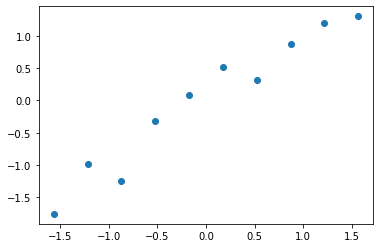

In [82]:
plt.scatter(X, y);

# 3 - LINEAR REGRESSION MODEL

### Simple Linear Regression Formula

### y = b0 + b1 * x

In [83]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [84]:
# Initialize variables b0 and b1

b0 = tf.Variable(0.5488135)
b1 = tf.Variable(0.71518937)

In [85]:
erro        = tf.losses.mean_squared_error(y, (b0 + b1 * X) )
otimizador  = tf.train.GradientDescentOptimizer( learning_rate = 0.001 )
treinamento = otimizador.minimize(erro)
init        = tf.global_variables_initializer()

In [86]:
# training model
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    # epochs
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])
b0_final, b1_final

(0.074125245, 0.9366143)

In [87]:
previsoes = b0_final + b1_final * X
previsoes

array([[-1.39326731],
       [-1.06718008],
       [-0.74109284],
       [-0.41500561],
       [-0.08891837],
       [ 0.23716886],
       [ 0.5632561 ],
       [ 0.88934333],
       [ 1.21543057],
       [ 1.5415178 ]])

In [88]:
type(previsoes)

numpy.ndarray

In [89]:
age = 40
age = np.array(age).reshape(-1, 1)
age
previsao = ssy.inverse_transform( b0_final + b1_final * ssX.transform(age)  )
previsao

array([[1475.55128351]])

In [90]:
y_inv = ssy.inverse_transform(y)
y_inv

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [91]:
previsoes_inv = ssy.inverse_transform(previsoes)
previsoes_inv

array([[ 993.40405087],
       [1102.98296738],
       [1212.56188389],
       [1322.1408004 ],
       [1431.71971691],
       [1541.29863342],
       [1650.87754993],
       [1760.45646644],
       [1870.03538294],
       [1979.61429945]])

In [92]:
mae = mean_absolute_error(y_inv, previsoes_inv)
std = abs(y_inv - previsoes_inv).std()
mse = mean_squared_error(y_inv, previsoes_inv)

print(mae, std, mse)

68.08075154150106 50.33052640240266 7168.15061839855


# 4 - MODEL REGRESSION VIEW

Text(0, 0.5, 'Cost')

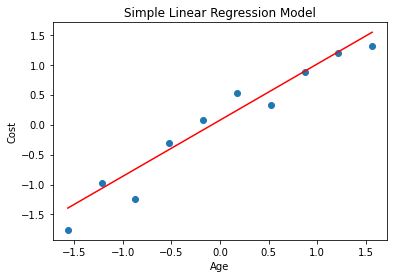

In [24]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color = 'red')
plt.title('Simple Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Cost')